<a href="https://colab.research.google.com/github/ratneshpathak12/CricketAnalytics/blob/main/IU_Capstone_Project__Player_Matchups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [ ]:
# ipl_ball_by_ball_data

In [ ]:
df = pd.read_csv('IPL_ball_by_ball_updated (1).csv')

In [ ]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.innings.unique()

array([2, 1, 4, 3, 6, 5])

In [ ]:
df = df[(df.innings == 1) | (df.innings == 2)]

In [ ]:
df.innings.unique()

array([2, 1])

In [ ]:
# What are the numbers when ABD faces Bumrah?
# step 1: Filter by player names - Done
# step 2: Use these names & assign it to striker & bowler - Done
# step 3: Get the required columns - Done

In [ ]:
df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [ ]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [ ]:
# player 1: JJ Bumrah
# player 2: AB de Villiers

In [ ]:
df[df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'R Dravid', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke',
       'B Akhil', 'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'KP Pietersen',
       'RV Uthappa', 'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh',
       'MK Pandey', 'RE van der Merwe', 'KP Appanna', 'D du Preez',
       'EJG Morgan', 'A Mithun', 'S Sriram', 'AUK Pathan',
       'AB de Villiers', 'TM Dilshan', 'SS Tiwary', 'MA Agarwal',
       'DL Vettori', 'CA Pujara', 'JJ van der Wath', 'R Ninan',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'KK Nair', 'DT Christian', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'Y

In [ ]:
req_df = df[(df.striker == 'AB de Villiers') & (df.bowler == 'JJ Bumrah')]

In [ ]:
req_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95691,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95692,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95695,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95928,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95942,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# No of runs scored?
# No of balls faced?
# No of times dismissed?

In [ ]:
# runs scored
sum(req_df.runs_off_bat)

125

In [ ]:
# balls faced
len(req_df)

86

In [ ]:
# outs
len(req_df[req_df.player_dismissed == 'AB de Villiers'])

3

In [ ]:
# strike rate
100*sum(req_df.runs_off_bat)/len(req_df)

145.34883720930233

In [ ]:
#ABD One on One Statistic against Bumrah

Number of balls = 86
Runs Scored = 125
Strike Rate = 145.34
Career Strike Rate = 148.58

#ABD slows down slightly against Bumrah as compared to other bowlers

In [ ]:
#Bumrah One on One Statistic against ABD

Number of balls = 86
Runs Scored = 125
Economy = 8.80
Career Economy = 7.36

#Bumrah gives slightly more runs against ABD as compared to other batsmen

In [ ]:
##NO DECISION POSSIBLE ON DIRECT ONE TO ONE STATISTIC, HENCE WE DO EXPLORATORY DATA ANALYSIS

In [ ]:
# Comparision against all batsman Bumrah has bowled to

In [ ]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bumrah_df = df[df.bowler =='JJ Bumrah']

In [ ]:
bumrah_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
76627,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.6,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KB Arun Karthik,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76628,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.5,Royal Challengers Bangalore,Mumbai Indians,KB Arun Karthik,CH Gayle,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76629,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.4,Royal Challengers Bangalore,Mumbai Indians,KK Nair,CH Gayle,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,lbw,KK Nair,NaN,NaN
76630,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.3,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76631,597999,2013,2013-04-04,M Chinnaswamy Stadium,1,12.2,Royal Challengers Bangalore,Mumbai Indians,CH Gayle,KK Nair,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# runs scored by this batsman
bdf1 = pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [ ]:
bdf2 = pd.DataFrame(bumrah_df.groupby('striker')['ball'].count()).reset_index()

In [ ]:
bdf2.head()

,striker,ball
0,A Mishra,5
1,AB de Villiers,86
2,AD Nath,4
3,AD Russell,41
4,AJ Finch,29


In [ ]:
bdf3 = bdf1.merge(bdf2, on = 'striker', how = 'left')

In [ ]:
bdf3.head(1)

,striker,runs_off_bat,ball
0,A Mishra,1,5


In [ ]:
bdf3['strike_rate'] = 100*bdf3['runs_off_bat']/bdf3['ball']

In [ ]:
bdf3.head(1)

,striker,runs_off_bat,ball,strike_rate
0,A Mishra,1,5,20.0


In [ ]:
# min criteria: 30 balls

In [ ]:
bdf3 = bdf3[bdf3.ball >= 30]

In [ ]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
1,AB de Villiers,125,86,145.348837
3,AD Russell,51,41,124.390244
8,AM Rahane,43,35,122.857143
9,AR Patel,21,32,65.625000
12,AT Rayudu,48,34,141.176471


In [ ]:
abd_df = df[df.striker =='AB de Villiers']

In [ ]:
# runs scored by this batsman
adf1 = pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index()

In [ ]:
adf1.head()

,bowler,runs_off_bat
0,A Ashish Reddy,46
1,A Chandila,26
2,A Flintoff,34
3,A Kumble,39
4,A Mishra,40


In [ ]:
# balls faced
adf2 = pd.DataFrame(abd_df.groupby('bowler')['ball'].count()).reset_index()

In [ ]:
adf2.head()

,bowler,ball
0,A Ashish Reddy,18
1,A Chandila,11
2,A Flintoff,12
3,A Kumble,41
4,A Mishra,37


In [ ]:
adf3 = adf1.merge(adf2, on = 'bowler', how = 'left')

In [ ]:
adf3.head(1)

,bowler,runs_off_bat,ball
0,A Ashish Reddy,46,18


In [ ]:
adf3['strike_rate'] = 100*adf3['runs_off_bat']/adf3['ball']

In [ ]:
adf3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108


In [ ]:
# min criteria : 30 balls

In [ ]:
adf3 = adf3[adf3.ball >= 30]

In [ ]:
# bdf3, adf3

In [ ]:
bdf3.reset_index(inplace = True, drop = True)
adf3.reset_index(inplace = True, drop = True)

In [ ]:
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,AB de Villiers,125,86,145.348837
1,AD Russell,51,41,124.390244
2,AM Rahane,43,35,122.857143
3,AR Patel,21,32,65.625000
4,AT Rayudu,48,34,141.176471


In [ ]:
# adf3.sort_values('strike_rate', ascending = False)

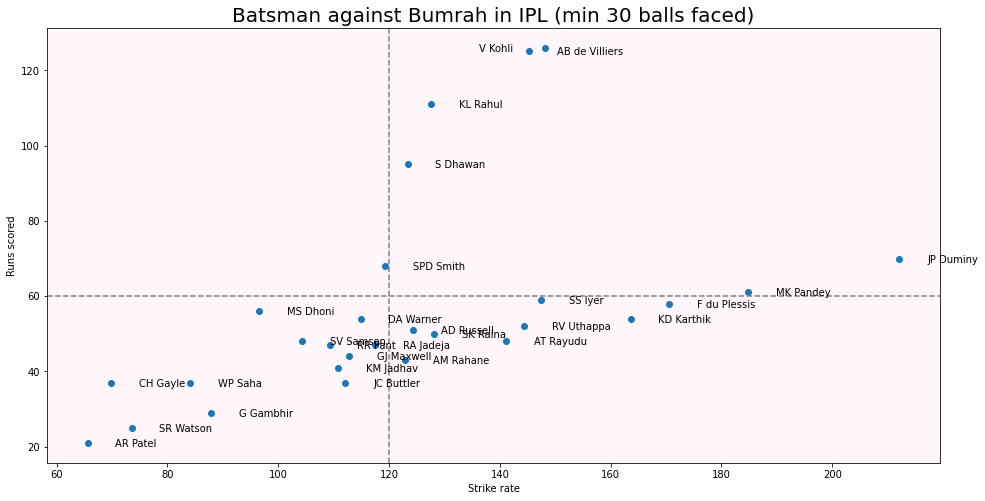

In [ ]:
plt.figure(figsize = (16, 8))
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)

for i in range(len(bdf3)):
#     plt.text(x, y, text)
    if bdf3['striker'][i] == 'V Kohli':
        plt.text(bdf3['strike_rate'][i] - 12, bdf3['runs_off_bat'][i] - 1, bdf3['striker'][i] )
    else:
        plt.text(bdf3['strike_rate'][i] + 5, bdf3['runs_off_bat'][i] - 1, bdf3['striker'][i] )

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title('Batsman against Bumrah in IPL (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

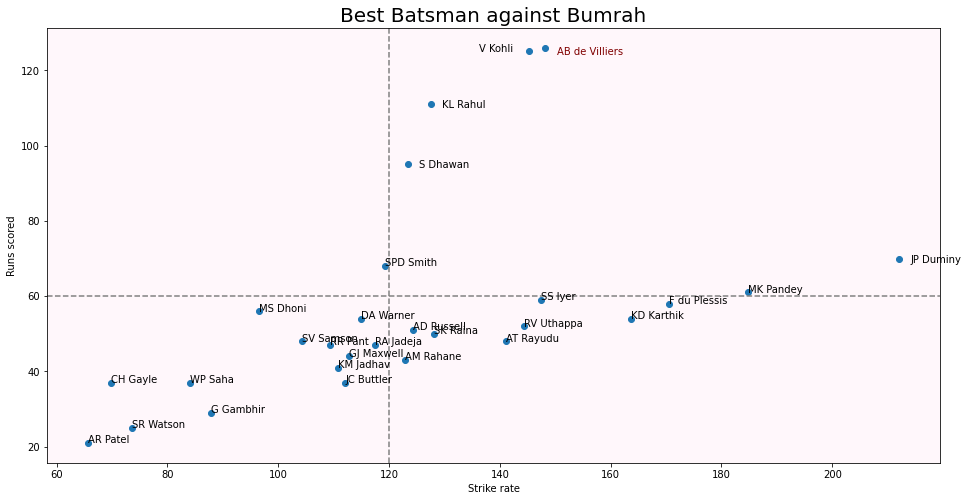

In [ ]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)

for i in range(len(bdf3)):
    if bdf3.striker[i] == 'V Kohli':
        plt.text(bdf3.strike_rate[i] - 12, bdf3.runs_off_bat[i] - 1, bdf3.striker[i])
    elif bdf3.striker[i] == 'AB de Villiers':
        plt.text(bdf3.strike_rate[i] + 5, bdf3.runs_off_bat[i] - 1, bdf3.striker[i], color = 'maroon')
    elif (bdf3.striker[i] == 'S Dhawan') | (bdf3.striker[i] == 'KL Rahul') | (bdf3.striker[i] == 'JP Duminy'):
        plt.text(bdf3.strike_rate[i] + 2, bdf3.runs_off_bat[i] - 1, bdf3.striker[i])
    else:
        plt.text(bdf3['strike_rate'][i], bdf3['runs_off_bat'][i], bdf3['striker'][i] )

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title("Best Batsman against Bumrah", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.savefig('Chart_ABD_vs_Bumrah_part1.jpg')
plt.show()

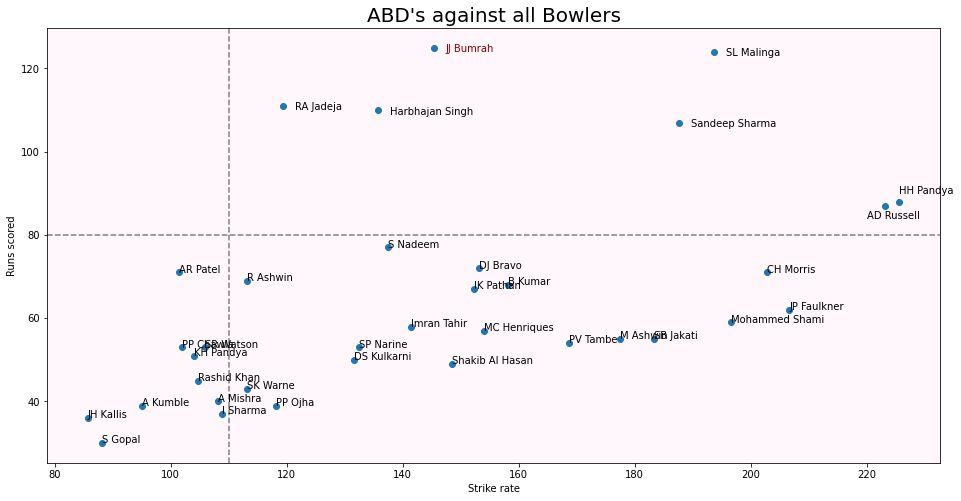

In [ ]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(adf3.strike_rate, adf3.runs_off_bat)

for i in range(len(adf3)):
    if adf3.bowler[i] == 'JJ Bumrah':
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i], color = 'maroon')
    elif (adf3.bowler[i] == 'RA Jadeja') | (adf3.bowler[i] == 'SL Malinga') | (adf3.bowler[i] == 'Sandeep Sharma') | (adf3.bowler[i] == 'Harbhajan Singh'):
        plt.text(adf3.strike_rate[i] + 2, adf3.runs_off_bat[i] - 1, adf3.bowler[i])
    elif (adf3.bowler[i] == 'HH Pandya'):
        plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i] + 2, adf3.bowler[i])
    elif (adf3.bowler[i] == 'AD Russell'):
        plt.text(adf3.strike_rate[i] - 3, adf3.runs_off_bat[i] - 3, adf3.bowler[i])
    else:
        plt.text(adf3.strike_rate[i], adf3.runs_off_bat[i], adf3.bowler[i])

plt.axvline(110, ls = '--', color = 'grey')
plt.axhline(80, ls = '--', color = 'grey')
plt.title("ABD's against all Bowlers", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.savefig('Chart_ABD_vs_Bumrah_part2.jpg')
plt.show()

In [ ]:
#Final Result
ABD > Bumrah
